


# Part 1 - Data Preprocessing


In [1]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import tensorflow as tf

In [4]:
# Importing the dataset
dataset = pd.read_csv('customer_data.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:, 3:13]  #iloc[] follows same syntax as list in python..
y = dataset.iloc[:, 13]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True) 
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [8]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Part 2 - Now let's make the ANN!

In [11]:

# Importing the Keras libraries and packages
from tensorflow import keras

Sequential = keras.Sequential
Dense = keras.layers.Dense  #used to create the hidden layers..

Dropout = keras.layers.Dropout



In [12]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_normal',activation='relu',input_dim = 11))
#as total no. of columns are 11 ,so input_dim = 11...to give a output dimension of 10.
                                
#dropout layer for 1st input data..
classifier.add(Dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.4))#dropout layer for 2nd hidden layer data..

# Adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.3))#dropout layer for 3rd hidden layer data..

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
#for an output layer we always use sigmoid activation



In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [50]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#binary_crossentropy to find for binary type of problems..

validation_split - is a fraction of data selected from last samples in x and y provided before shuffling.
But this validation data is not used to train data instead it evaluate loss and accuracy on it..

In [51]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)
#we have to fit both train data of both input and output to check our loss...

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 0.6934 - accuracy: 0.6914 - val_loss: 0.5197 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5417 - accuracy: 0.7826 - val_loss: 0.4881 - val_accuracy: 0.7910
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5092 - accuracy: 0.7908 - val_loss: 0.4658 - val_accuracy: 0.7910
Epoch 4/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4958 - accuracy: 0.7946 - val_loss: 0.4586 - val_accuracy: 0.7910
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4741 - accuracy: 0.7957 - val_loss: 0.4508 - val_accuracy: 0.7910
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4739 - accuracy: 0.7957 - val_loss: 0.4476 - val_accuracy: 0.7910
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4617 - accuracy: 0.7998 - val_loss: 0.4435 - val_accuracy: 0.7910

Epoch 58/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3688 - accuracy: 0.8464 - val_loss: 0.3664 - val_accuracy: 0.8432
Epoch 59/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3676 - accuracy: 0.8509 - val_loss: 0.3719 - val_accuracy: 0.8334
Epoch 60/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3699 - accuracy: 0.8520 - val_loss: 0.3649 - val_accuracy: 0.8440
Epoch 61/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3682 - accuracy: 0.8507 - val_loss: 0.3725 - val_accuracy: 0.8353
Epoch 62/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3736 - accuracy: 0.8438 - val_loss: 0.3703 - val_accuracy: 0.8387
Epoch 63/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3632 - accuracy: 0.8520 - val_loss: 0.3639 - val_accuracy: 0.8470
Epoch 64/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3703 - accuracy: 0.8489 - val_loss: 0.3678 - val_accuracy:

In [52]:
# list all data in history
print(model_history.history.keys())  #loss and accuracy belongs to input

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


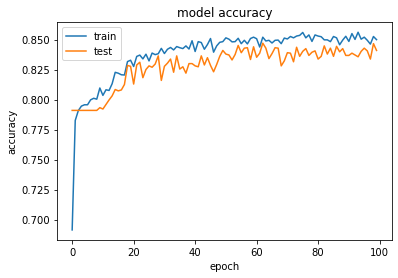

In [53]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


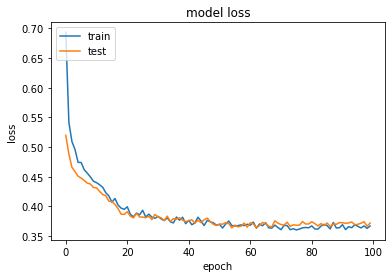

In [54]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Part 3 - Making the predictions and evaluating the model

In [55]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)  #we set thresold value here to return 'True' if (y_pred > 0.5), else 'False'...
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [56]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1592,   15],
       [ 285,  108]], dtype=int64)

In [57]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score*100

85.0